In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Iris Dataset

In [3]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Checking Dataset

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


## Data Visualization

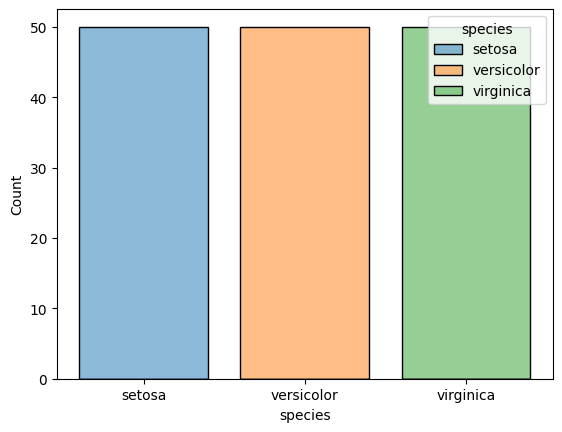

In [7]:
sns.histplot(data=df, x='species', hue='species', shrink=.8)
plt.show()

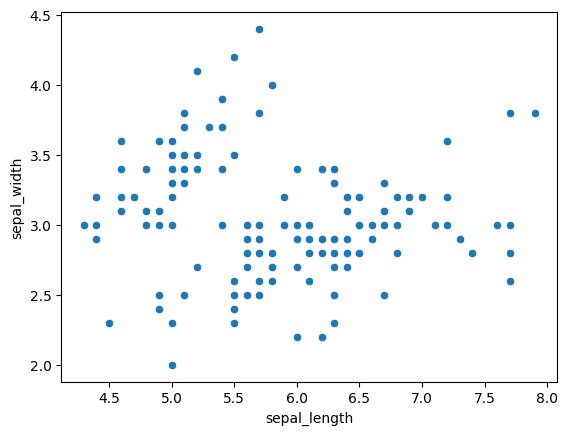

In [8]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width')
plt.show()

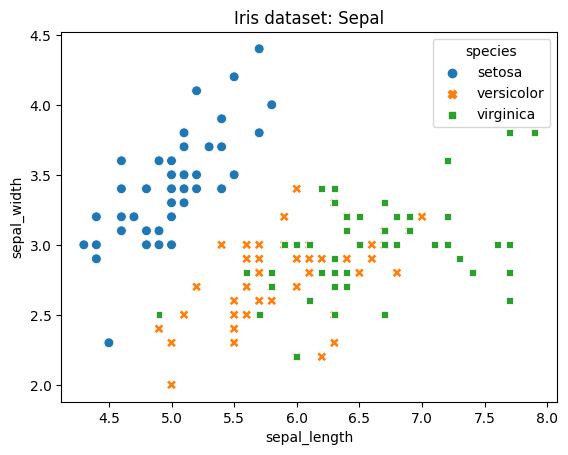

In [9]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=50)
plt.title('Iris dataset: Sepal')
plt.show()

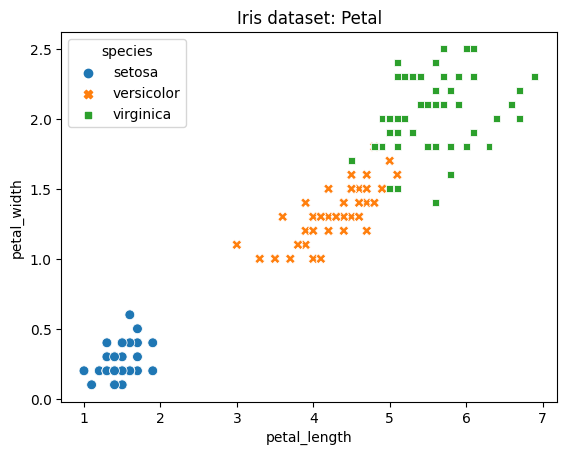

In [10]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', style='species', s=50)
plt.title('Iris dataset: Petal')
plt.show()

## KDE

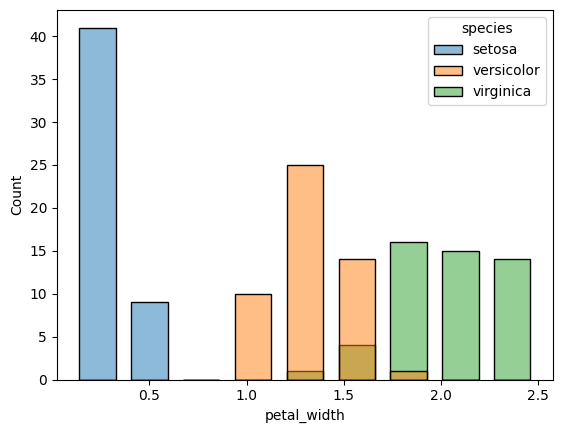

In [11]:
sns.histplot(data=df, x='petal_width', hue='species', shrink=0.7)
plt.show()

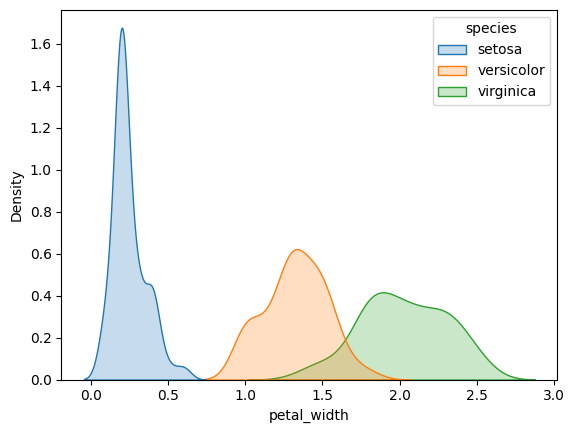

In [12]:
sns.kdeplot(data=df, x='petal_width', hue='species', fill=True)
plt.show()

## Pairplot Seaborn

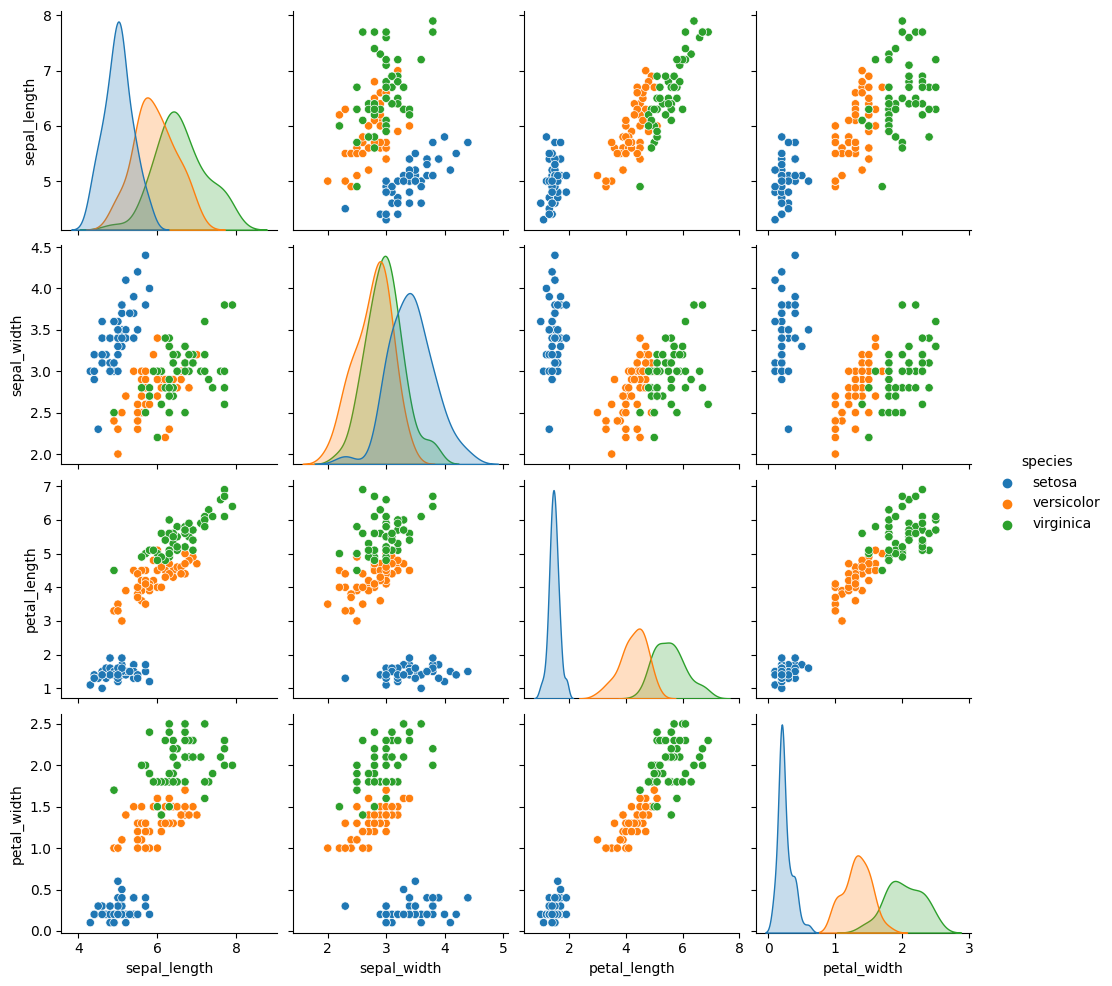

In [13]:
sns.pairplot(data=df, hue='species')
plt.show()

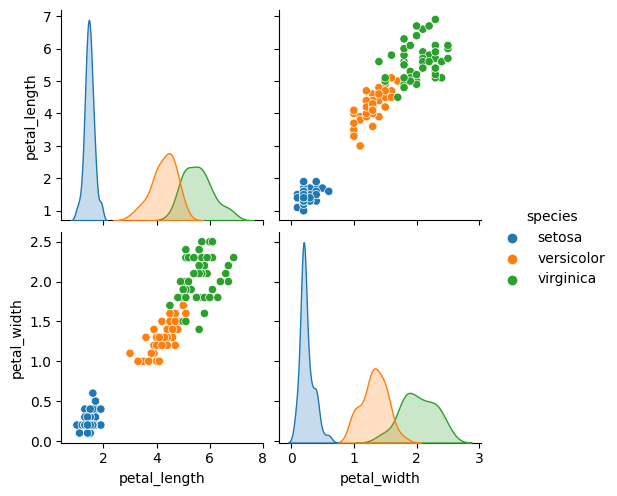

In [14]:
cols = ['petal_length', 'petal_width', 'species']
sns.pairplot(data=df[cols], hue='species')
plt.show()

## Preparing Data for Training Model

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
X = df.drop('species', axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

#### Label Encoding

In [18]:
y, class_names = pd.factorize(df.species)

class_names

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [19]:
for i in class_names:
    print(i)

setosa
versicolor
virginica


In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Split Data

In [21]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.30, random_state=20)

In [22]:
Xtrain.shape, Xtest.shape

((105, 4), (45, 4))

In [23]:
ytrain.shape, ytest.shape

((105,), (45,))

In [24]:
(label, count) = np.unique(ytest, return_counts=True)
freq = np.asarray((label, count)).T
print(freq)

[[ 0 13]
 [ 1 18]
 [ 2 14]]


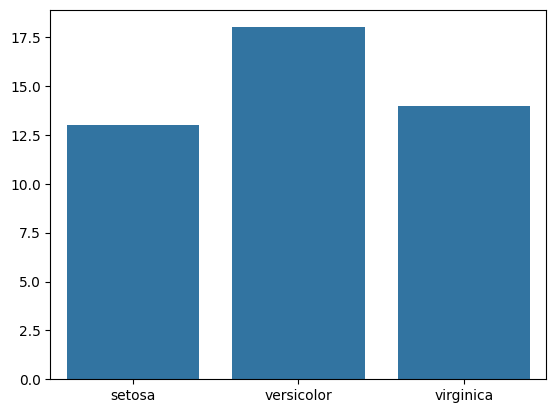

In [25]:
sns.barplot(x=freq[:,0], y=freq[:,1])
plt.xticks(np.arange(3), class_names)
plt.show()

## Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [27]:
model.feature_importances_

array([0.        , 0.01908397, 0.00876831, 0.97214772])

#### Tree

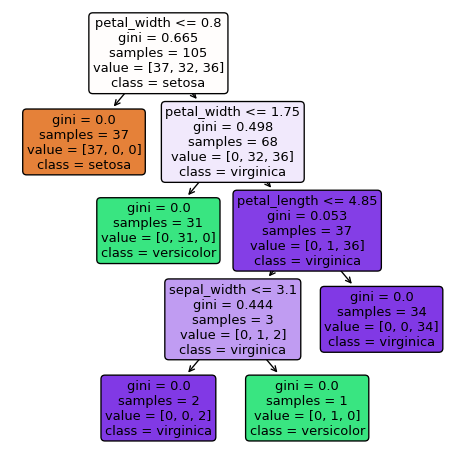

In [28]:
from sklearn.tree import plot_tree

featureName = X.columns

plt.subplots(nrows=1, ncols=1, figsize=(6,6), dpi=96)
plot_tree(model, filled=True, rounded=True, feature_names=featureName, class_names=class_names)
plt.show()

#### Evaluation: Decision Tree

In [29]:
score = model.score(Xtest, ytest)
print('score: {}/100'.format((score*100).round(2)))

score: 88.89/100


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

yPred = model.predict(Xtest)

print('accuracy score: {}/100'.format((accuracy_score(ytest, yPred)*100).round(2)))

print(classification_report(ytest, yPred, target_names=class_names))

cm = confusion_matrix(ytest, yPred)
print(cm)


accuracy score: 88.89/100
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.78      1.00      0.88        18
   virginica       1.00      0.64      0.78        14

    accuracy                           0.89        45
   macro avg       0.93      0.88      0.89        45
weighted avg       0.91      0.89      0.88        45

[[13  0  0]
 [ 0 18  0]
 [ 0  5  9]]


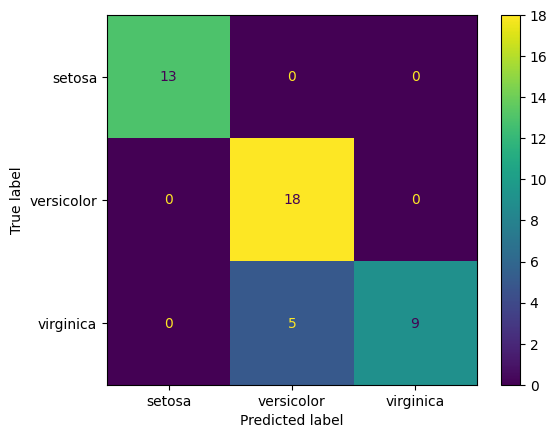

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.show()

### Predict outsource data

In [32]:
X_new = np.array([[4.2, 4.0, 1.9, 0.8],     # 
                  [6.1, 3.5, 3.9, 1.5],     # 
                  [6.7, 3.5, 6.3, 1.4]])    # 

pred = model.predict(X_new)
pred
# print(class_names[y_pred][0])
for i in pred:
    print(class_names[i])

setosa
versicolor
versicolor


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Plot Decision Regions

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


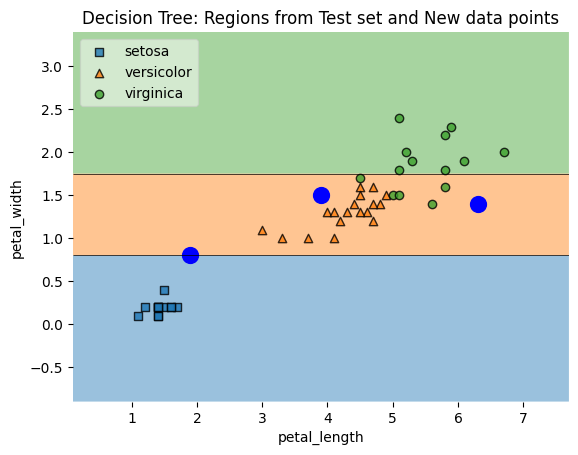

In [33]:
# จาก Test-set และ New data points (ที่ Predict)

from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(Xtest), ytest, 
                      clf=model, feature_index=[2, 3],  # Petal Length-Width  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('Decision Tree: Regions from Test set and New data points')

plt.xticks()
plt.yticks()
plt.xlabel(df.columns[2]) 
plt.ylabel(df.columns[3])

# new data
plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')

plt.show()

## SVM

In [34]:
from sklearn.svm import SVC

modelv2 = SVC(kernel='linear')
# model = SVC(kernel='rbf')     # default

modelv2.fit(Xtrain, ytrain)

SVC(kernel='linear')

#### Evaluation: SVM

In [35]:
yPred_v2 = modelv2.predict(Xtest)

print('score: {}/100'.format((accuracy_score(ytest, yPred_v2)*100).round(2)))

print(classification_report(ytest, yPred_v2, target_names=class_names))

cm_v2 = confusion_matrix(ytest, yPred_v2)
print(cm_v2)

score: 93.33/100
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92        18
   virginica       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[13  0  0]
 [ 0 18  0]
 [ 0  3 11]]


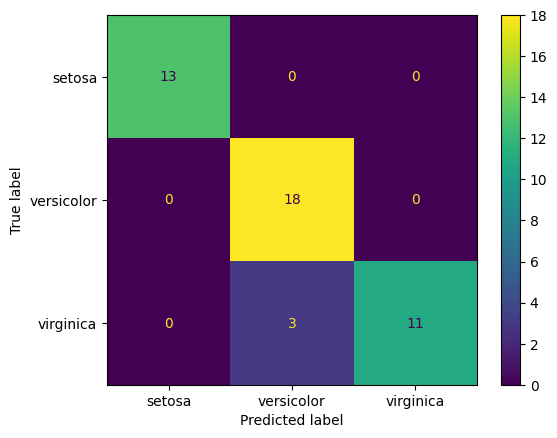

In [36]:
ConfusionMatrixDisplay(cm_v2, display_labels=class_names).plot()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


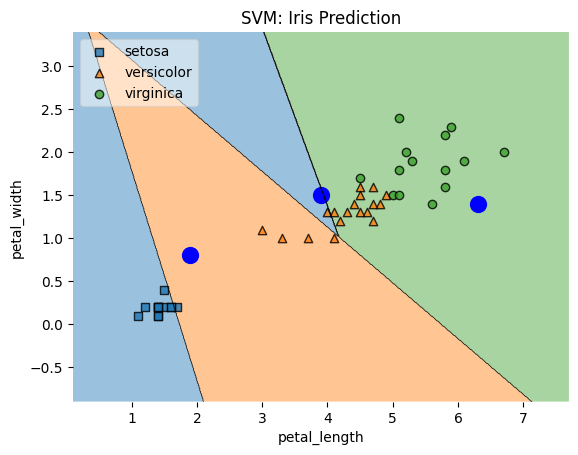

In [37]:
from mlxtend.plotting import plot_decision_regions

value = 0
width = 9.5

ax = plot_decision_regions(np.array(Xtest), ytest, 
                      clf=modelv2, feature_index=[2, 3],  
                      filler_feature_values={0: value, 1: value},
                      filler_feature_ranges={0: width, 1: width},
                      legend=2) 

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, class_names, framealpha=0.5, loc='upper left')

plt.title('SVM: Iris Prediction')

# plt.xticks([])
# plt.yticks([])
plt.xlabel(df.columns[2]) 
plt.ylabel(df.columns[3])

plt.scatter(X_new[:,2], X_new[:,3], marker='o', s=130, c='b')
plt.show()

ถ้าจะกลับมาอ่านแล้วอยากได้แบบละเอียดให้ไปดูที่ไฟล์ ch12 Iris SVM.ipynb